=== Linear Regression ===
RMSE: 0.1491
R2 Score: 0.1629

=== Random Forest ===
RMSE: 0.1127
R2 Score: 0.5217

=== XGBoost ===
RMSE: 0.1221
R2 Score: 0.4384

               Model      RMSE  R2 Score
0  Linear Regression  0.149092  0.162852
1      Random Forest  0.112689  0.521745
2            XGBoost  0.122111  0.438429


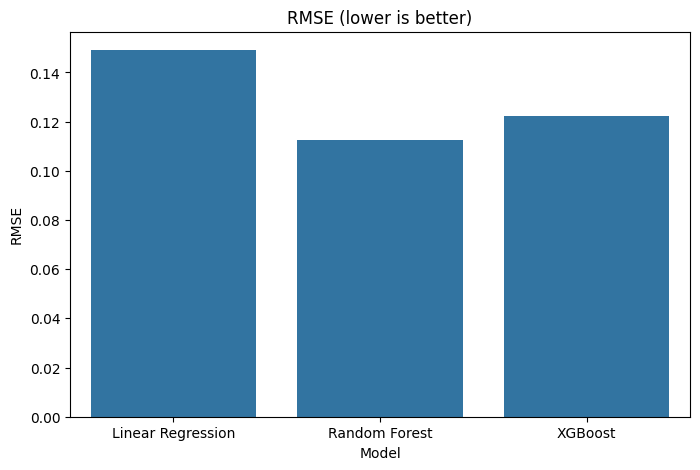

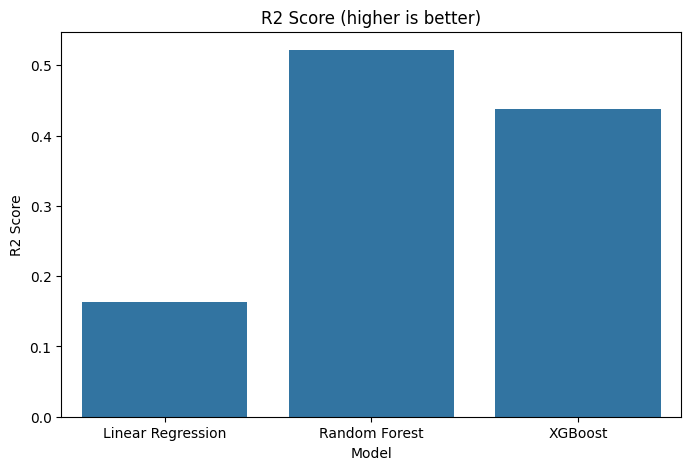

Best model: Random Forest
Model saved as best_model_random_forest.joblib
Label encoders saved as label_encoders.joblib


In [3]:
# %% [markdown]
# # Modeling: Employee Productivity Prediction
# Train and compare:
# - Linear Regression
# - Random Forest
# - XGBoost
# Save the best model as .joblib

# %%
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# %%
# Load dataset
df = pd.read_csv('../data/garments_worker_productivity.csv')

# %% [markdown]
# ## Data preparation
# Use selected features from EDA

# %%
selected_features = [
    'targeted_productivity', 'smv', 'over_time',
    'incentive', 'no_of_workers', 'department', 'day'
]
target = 'actual_productivity'

# Subset data
data = df[selected_features + [target]].copy()

# Encode categorical features
label_encoders = {}
for col in ['department', 'day']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Handle missing values
data.fillna(data.median(numeric_only=True), inplace=True)

# %%
# Train-test split
X = data[selected_features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# %% [markdown]
# ## Train and evaluate models

# %%
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'XGBoost': XGBRegressor(random_state=42, n_estimators=100, verbosity=0)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R2 Score': r2
    })
    
    print(f"=== {name} ===")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}\n")

# %% [markdown]
# ## 📊 Compare models

# %%
results_df = pd.DataFrame(results)
print(results_df)

# Plot RMSE
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='Model', y='RMSE')
plt.title('RMSE (lower is better)')
plt.show()

# Plot R2 Score
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='Model', y='R2 Score')
plt.title('R2 Score (higher is better)')
plt.show()

# %% [markdown]
# ## ✅ Save the best model using joblib

# %%
# Get the model with highest R2 Score
best_model_name = results_df.sort_values(by='R2 Score', ascending=False).iloc[0]['Model']
best_model = models[best_model_name]

print(f"Best model: {best_model_name}")

# Save model
joblib.dump(best_model, f'best_model_{best_model_name.replace(" ", "_").lower()}.joblib')
print(f"Model saved as best_model_{best_model_name.replace(' ', '_').lower()}.joblib")

# Also save encoders if needed
joblib.dump(label_encoders, 'label_encoders.joblib')
print("Label encoders saved as label_encoders.joblib")
